# One-dimensional Ising model with spin-$\frac{1}{2}$ particles

The Hamiltonian for a system of $ N $ spin-$\frac{1}{2}$ particles on a one-dimensional lattice is given by:

$$
\hat{H} = \lambda \sum_{i=1}^{N} \sigma_z^{(i)} + \sum_{i=1}^{N-1} \sigma_x^{(i)} \sigma_x^{(i+1)}
$$

where $ \sigma_x $ and $ \sigma_z $ are the Pauli matrices and $ \lambda $ is the interaction strength.

1. Write a program to compute the $ N \times N $ matrix representation of the Hamiltonian $ \hat{H} $ for different $ N $.

2. Diagonalize $ \hat{H} $ for different $ N = 1, \ldots, N_{\text{max}} $ and $ \lambda \in [0, -3] $. What is the largest $ N_{\text{max}} $ you can reach?.

3. Plot the first $ k $ levels as a function of $ \lambda $ for different $ N $ and comment on the spectrum.

**Import zone**

In [1]:
import ising_model as im
import phase_transition_functions as ptf

import numpy as np

**Energy gaps analysis**

In [2]:
N_vals = np.arange(4, 15, 1)
l_vals = np.linspace(-0.3, 2, 50)
k = 3

eigenvalues, _ = im.diagonalize_ising(N_vals, l_vals, k)

Diagonalizing Ising Hamiltonian with N=4 ...
Diagonalizing Ising Hamiltonian with N=5 ...
Diagonalizing Ising Hamiltonian with N=6 ...
Diagonalizing Ising Hamiltonian with N=7 ...
Diagonalizing Ising Hamiltonian with N=8 ...
Diagonalizing Ising Hamiltonian with N=9 ...
Diagonalizing Ising Hamiltonian with N=10 ...
Diagonalizing Ising Hamiltonian with N=11 ...
Diagonalizing Ising Hamiltonian with N=12 ...
Diagonalizing Ising Hamiltonian with N=13 ...
Diagonalizing Ising Hamiltonian with N=14 ...


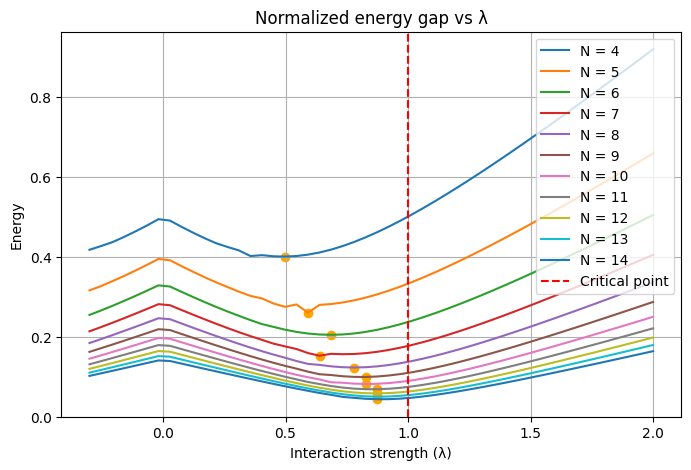

In [3]:
gaps, ls = ptf.plot_energy_gaps(N_vals, l_vals, eigenvalues, no_deg=True)

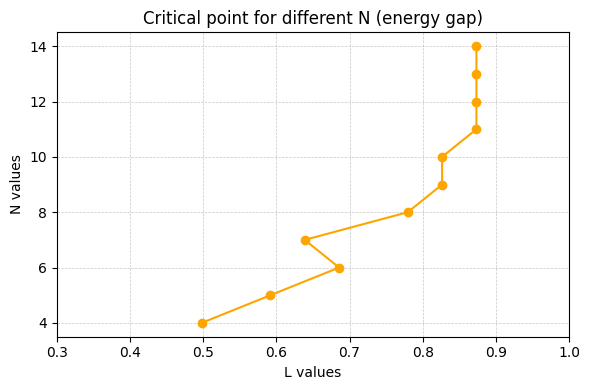

In [4]:
ptf.plot_pt_gap(N_vals, ls)

**Magnetization**

In [5]:
N_vals = np.arange(2, 15, 1)
l_vals = np.logspace(-2, 2, 20)
k = 2

_, eigenvectors = im.diagonalize_ising(N_vals, l_vals, k)

Diagonalizing Ising Hamiltonian with N=2 ...
Diagonalizing Ising Hamiltonian with N=3 ...
Diagonalizing Ising Hamiltonian with N=4 ...
Diagonalizing Ising Hamiltonian with N=5 ...
Diagonalizing Ising Hamiltonian with N=6 ...
Diagonalizing Ising Hamiltonian with N=7 ...
Diagonalizing Ising Hamiltonian with N=8 ...
Diagonalizing Ising Hamiltonian with N=9 ...
Diagonalizing Ising Hamiltonian with N=10 ...
Diagonalizing Ising Hamiltonian with N=11 ...
Diagonalizing Ising Hamiltonian with N=12 ...
Diagonalizing Ising Hamiltonian with N=13 ...
Diagonalizing Ising Hamiltonian with N=14 ...


/home/kallo27/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/kallo27/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


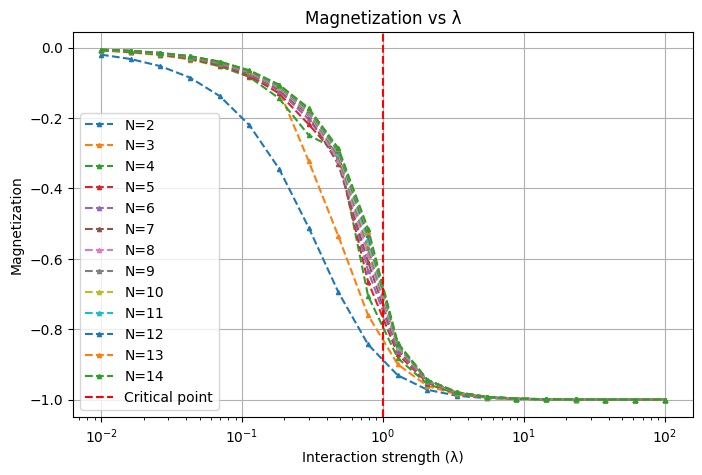

In [6]:
ptf.plot_magnetization(N_vals, l_vals, eigenvectors)

In [7]:
N_vals = np.arange(7, 15, 1)
l_vals = np.logspace(-1, 1, 35)
k = 2

_, eigenvectors = im.diagonalize_ising(N_vals, l_vals, k)

Diagonalizing Ising Hamiltonian with N=7 ...
Diagonalizing Ising Hamiltonian with N=8 ...
Diagonalizing Ising Hamiltonian with N=9 ...
Diagonalizing Ising Hamiltonian with N=10 ...
Diagonalizing Ising Hamiltonian with N=11 ...
Diagonalizing Ising Hamiltonian with N=12 ...
Diagonalizing Ising Hamiltonian with N=13 ...
Diagonalizing Ising Hamiltonian with N=14 ...


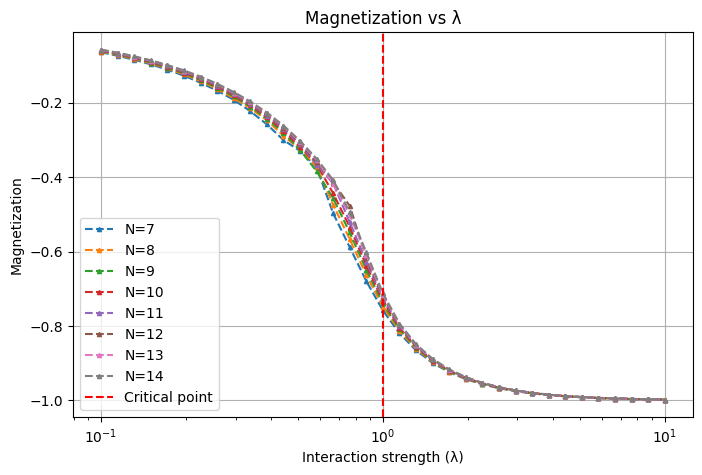

In [8]:
ptf.plot_magnetization(N_vals, l_vals, eigenvectors)

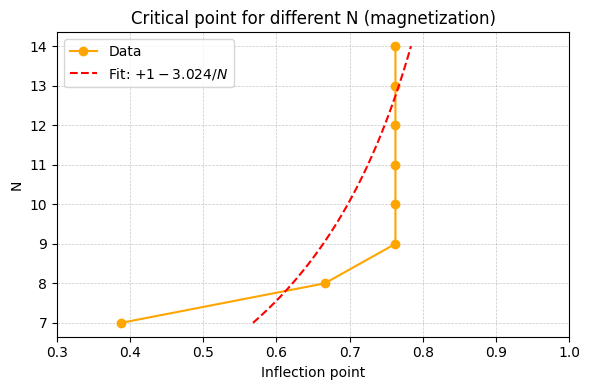

In [9]:
ptf.plot_pt_magnetization(N_vals, l_vals, eigenvectors)

**Entropy**

In [10]:
N_vals = np.arange(2, 15, 1)
l_vals = np.logspace(-1, 1, 40)
k = 2

_, eigenvectors = im.diagonalize_ising(N_vals, l_vals, k)

Diagonalizing Ising Hamiltonian with N=2 ...
Diagonalizing Ising Hamiltonian with N=3 ...
Diagonalizing Ising Hamiltonian with N=4 ...
Diagonalizing Ising Hamiltonian with N=5 ...
Diagonalizing Ising Hamiltonian with N=6 ...
Diagonalizing Ising Hamiltonian with N=7 ...
Diagonalizing Ising Hamiltonian with N=8 ...
Diagonalizing Ising Hamiltonian with N=9 ...
Diagonalizing Ising Hamiltonian with N=10 ...
Diagonalizing Ising Hamiltonian with N=11 ...
Diagonalizing Ising Hamiltonian with N=12 ...
Diagonalizing Ising Hamiltonian with N=13 ...
Diagonalizing Ising Hamiltonian with N=14 ...


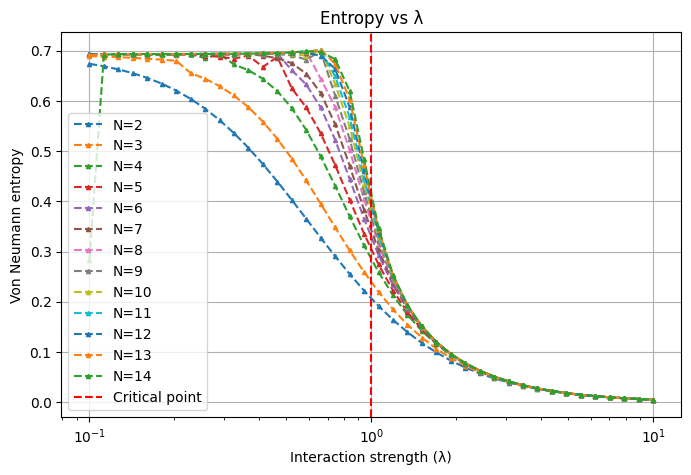

In [ ]:
ptf.plot_entropy(N_vals, l_vals, eigenvectors)

In [12]:
N_vals = np.arange(7, 20, 1)
l_vals = [1]
k = 2

_, eigenvectors = im.diagonalize_ising(N_vals, l_vals, k)

Diagonalizing Ising Hamiltonian with N=7 ...
Diagonalizing Ising Hamiltonian with N=8 ...
Diagonalizing Ising Hamiltonian with N=9 ...
Diagonalizing Ising Hamiltonian with N=10 ...


Diagonalizing Ising Hamiltonian with N=11 ...
Diagonalizing Ising Hamiltonian with N=12 ...
Diagonalizing Ising Hamiltonian with N=13 ...
Diagonalizing Ising Hamiltonian with N=14 ...
Diagonalizing Ising Hamiltonian with N=15 ...
Diagonalizing Ising Hamiltonian with N=16 ...
Diagonalizing Ising Hamiltonian with N=17 ...
Diagonalizing Ising Hamiltonian with N=18 ...
Diagonalizing Ising Hamiltonian with N=19 ...


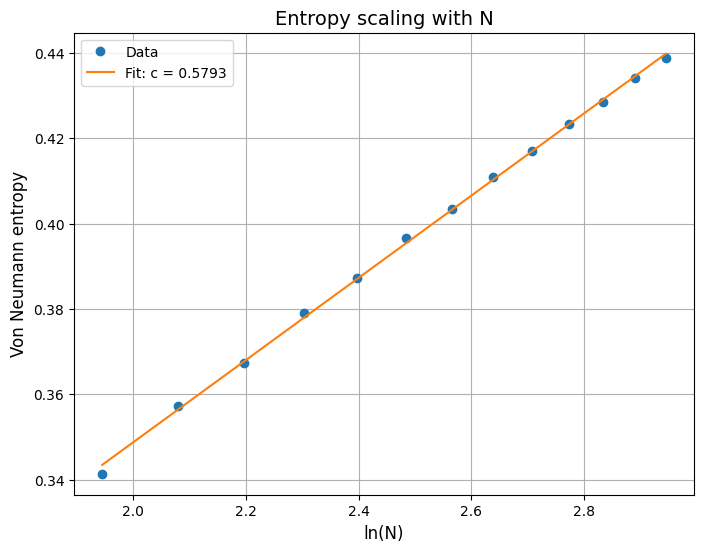

Estimated central charge: 0.5792816718092414 +/- 0.0050640083601413925


In [13]:
ptf.analyze_entropy_scaling(N_vals, eigenvectors)

**Two-point correlation function**

In [14]:
N_vals = np.arange(5, 15, 1)
l_vals = np.logspace(-1, 1, 40)
k = 2

_, eigenvectors = im.diagonalize_ising(N_vals, l_vals, k)

Diagonalizing Ising Hamiltonian with N=5 ...
Diagonalizing Ising Hamiltonian with N=6 ...
Diagonalizing Ising Hamiltonian with N=7 ...
Diagonalizing Ising Hamiltonian with N=8 ...
Diagonalizing Ising Hamiltonian with N=9 ...
Diagonalizing Ising Hamiltonian with N=10 ...
Diagonalizing Ising Hamiltonian with N=11 ...
Diagonalizing Ising Hamiltonian with N=12 ...
Diagonalizing Ising Hamiltonian with N=13 ...
Diagonalizing Ising Hamiltonian with N=14 ...


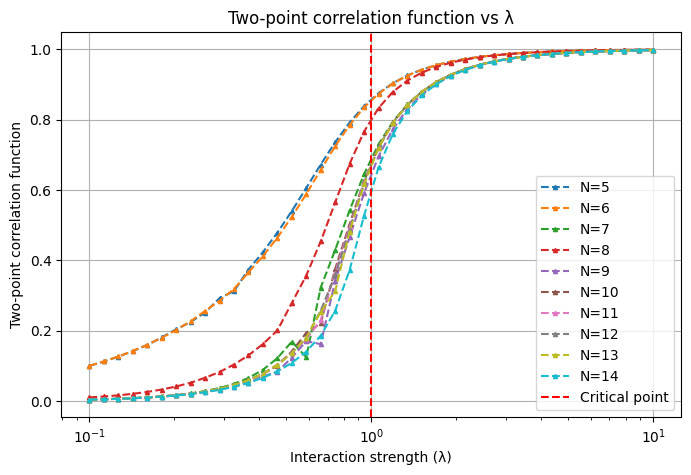

In [15]:
ptf.plot_correlations(N_vals, l_vals, eigenvectors)

In [16]:
N_vals = np.arange(7, 15, 1)
l_vals = [1]
k = 2

_, eigenvectors = im.diagonalize_ising(N_vals, l_vals, k)

Diagonalizing Ising Hamiltonian with N=7 ...
Diagonalizing Ising Hamiltonian with N=8 ...
Diagonalizing Ising Hamiltonian with N=9 ...
Diagonalizing Ising Hamiltonian with N=10 ...
Diagonalizing Ising Hamiltonian with N=11 ...
Diagonalizing Ising Hamiltonian with N=12 ...
Diagonalizing Ising Hamiltonian with N=13 ...
Diagonalizing Ising Hamiltonian with N=14 ...


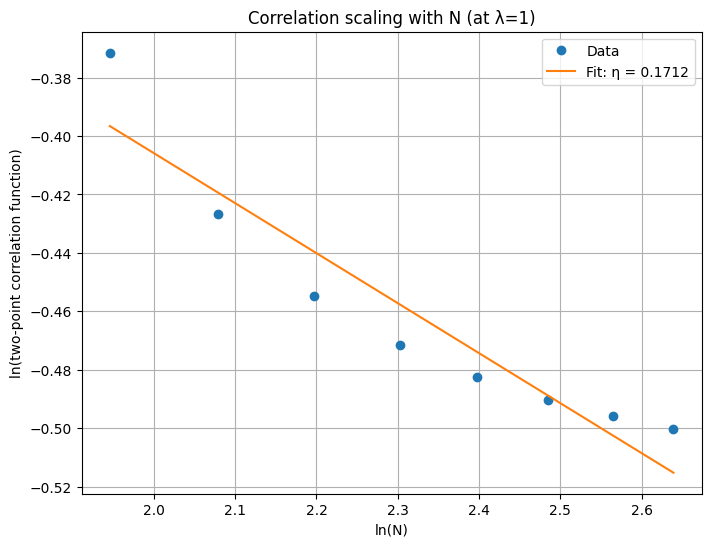

Estimated η: 0.17122544090667896 +/- 0.024420085950835356


In [17]:
ptf.analyze_correlation_scaling(N_vals, eigenvectors)